In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('final_montana2.csv')
df['date'] = pd.to_datetime(df['date'])

In [335]:
# df.rename(columns={'D0': 'D0-D4','D1': 'D1-D4','D2': 'D2-D4','D3': 'D3-D4'}, inplace=True)
# df.iloc[1000:1004][['D0-D4','D1-D4','D2-D4','D3-D4','D4']]

### changing cum to categorical in D0 D1 d2 d3 d4 

In [13]:
df

fips       date   PRECTOT         PS      QV2M        T2M  \
0      30001.0 2000-01-07  1.941429  78.851429  1.980000 -10.382857   
1      30001.0 2000-01-14  2.212857  78.897143  2.667143  -7.305714   
2      30001.0 2000-01-21  0.237143  79.078571  2.170000  -9.975714   
3      30001.0 2000-01-28  0.817143  79.181429  1.748571 -12.887143   
4      30001.0 2000-02-04  0.497143  79.670000  2.764286  -6.821429   
...        ...        ...       ...        ...       ...        ...   
49612  30111.0 2016-12-02  0.221429  88.071429  2.617143  -1.142857   
49613  30111.0 2016-12-09  0.747143  88.595714  1.334286 -10.831429   
49614  30111.0 2016-12-16  2.010000  88.367143  1.331429 -12.171429   
49615  30111.0 2016-12-23  0.507143  88.128571  2.141429  -5.890000   
49616  30111.0 2016-12-27  0.100000  87.940000  2.190000  -3.990000   

          T2MDEW     T2MWET   T2M_MAX    T2M_MIN  ...   None   D0   D1   D2  \
0     -11.461429 -11.432857 -4.555714 -15.307143  ...  100.0  0.0  0.0  0.0   
1      -8.472857  -8.455714 -2.548571 -13.185714  ...  100.0  0.0  0.0  0.0   
2     -10.610000 -10.600000 -2.838571 -14.751429  ...  100.0  0.0  0.0  0.0   
3     -13.450000 -13.447143 -4.922857 -18.477143  ...  100.0  0.0  0.0  0.0   
4      -7.684286  -7.667143 -0.904286 -13.235714  ...  100.0  0.0  0.0  0.0   
...          ...        ...       ...        ...  ...    ...  ...  ...  ...   
49612  -6.740000  -6.632857  3.075714  -4.050000  ...  100.0  0.0  0.0  0.0   
49613 -14.940000 -14.531429 -6.305714 -14.255714  ...  100.0  0.0  0.0  0.0   
49614 -14.970000 -14.721429 -7.288571 -17.250000  ...  100.0  0.0  0.0  0.0   
49615  -9.321429  -9.218571 -1.134286  -9.488571  ...  100.0  0.0  0.0  0.0   
49616  -8.990000  -8.700000  0.790000  -8.450000  ...  100.0  0.0  0.0  0.0   

        D3   D4  ValidStart    ValidEnd  StatisticFormatID  DSCI  
0      0.0  0.0  04-01-2000  10-01-2000                1.0   0.0  
1      0.0  0.0  11-01-2000  17-01-2000                1.0   0.0  
2      0.0  0.0  18-01-2000  24-01-2000                1.0   0.0  
3      0.0  0.0  25-01-2000  31-01-2000                1.0   0.0  
4      0.0  0.0  01-02-2000  07-02-2000                1.0   0.0  
...    ...  ...         ...         ...                ...   ...  
49612  0.0  0.0  29-11-2016  05-12-2016                1.0   0.0  
49613  0.0  0.0  06-12-2016  12-12-2016                1.0   0.0  
49614  0.0  0.0  13-12-2016  19-12-2016                1.0   0.0  
49615  0.0  0.0  20-12-2016  26-12-2016                1.0   0.0  
49616  0.0  0.0  27-12-2016  02-01-2017                1.0   0.0  

[49617 rows x 33 columns]

In [14]:
df['DSCI']=df['D0']+df['D1']+df['D2']+df['D3']+df['D4']

In [17]:
df.iloc[1000:1006]

fips       date   PRECTOT         PS      QV2M       T2M    T2MDEW  \
1000  30003.0 2002-03-15  1.060000  85.262857  2.331429 -2.721429 -8.640000   
1001  30003.0 2002-03-22  0.932857  85.872857  2.217143 -4.311429 -9.474286   
1002  30003.0 2002-03-29  0.998571  85.451429  2.878571  1.918571 -5.891429   
1003  30003.0 2002-04-05  0.527143  85.750000  2.881429  2.358571 -6.752857   
1004  30003.0 2002-04-12  1.235714  85.310000  4.534286  9.710000 -0.058571   
1005  30003.0 2002-04-19  2.735714  85.447143  3.148571  1.712857 -4.830000   

        T2MWET    T2M_MAX    T2M_MIN  ...  None   D0   D1     D2     D3   D4  \
1000 -8.505714   1.988571  -6.598571  ...   0.0  0.0  0.0  64.30  35.70  0.0   
1001 -9.315714   2.102857 -10.038571  ...   0.0  0.0  0.0  22.19  77.81  0.0   
1002 -5.794286   8.208571  -3.594286  ...   0.0  0.0  0.0  24.55  75.45  0.0   
1003 -6.554286  10.085714  -4.447143  ...   0.0  0.0  0.0  23.60  76.40  0.0   
1004 -0.022857  17.235714   2.398571  ...   0.0  0.0  0.0  27.08  72.92  0.0   
1005 -4.771429   7.368571  -4.088571  ...   0.0  0.0  0.0   0.61  99.39  0.0   

      ValidStart    ValidEnd  StatisticFormatID    DSCI  
1000  12-03-2002  18-03-2002                1.0  335.70  
1001  19-03-2002  25-03-2002                1.0  377.81  
1002  26-03-2002  01-04-2002                1.0  375.45  
1003  02-04-2002  08-04-2002                1.0  376.40  
1004  09-04-2002  15-04-2002                1.0  372.92  
1005  16-04-2002  22-04-2002                1.0  399.39  

[6 rows x 33 columns]

In [16]:
df['D0']=df['D0']-df['D1']
df['D1']=df['D1']-df['D2']
df['D2']=df['D2']-df['D3']
df['D3']=df['D3']-df['D4']

In [338]:
df.iloc[1000:1004][pred_col]


None   D0   D1     D2     D3   D4
1000   0.0  0.0  0.0  64.30  35.70  0.0
1001   0.0  0.0  0.0  22.19  77.81  0.0
1002   0.0  0.0  0.0  24.55  75.45  0.0
1003   0.0  0.0  0.0  23.60  76.40  0.0

In [18]:
df.iloc[25]

fips                             30001.0
date                 2000-06-30 00:00:00
PRECTOT                         1.082857
PS                                 79.34
QV2M                            6.358571
T2M                            15.997143
T2MDEW                          3.592857
T2MWET                          3.611429
T2M_MAX                        24.408571
T2M_MIN                         7.338571
T2M_RANGE                      17.068571
TS                                 16.39
WS10M                           2.575714
WS10M_MAX                       4.727143
WS10M_MIN                       0.882857
WS10M_RANGE                     3.842857
WS50M                           3.912857
WS50M_MAX                       6.637143
WS50M_MIN                       1.347143
WS50M_RANGE                     5.288571
score                             0.5026
County                 Beaverhead County
State                                 MT
None                               51.07
D0              

In [340]:
((df['None']+df['D0']+df['D1']+df['D2']+df['D3']+df['D4']).astype(int)!=100)[0:26].sum()

0

In [19]:
X_col_wit_fips=df.columns[2:20]
X_col_wit_fips

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'],
      dtype='object')

### Mean value of targets (overall + countywise)

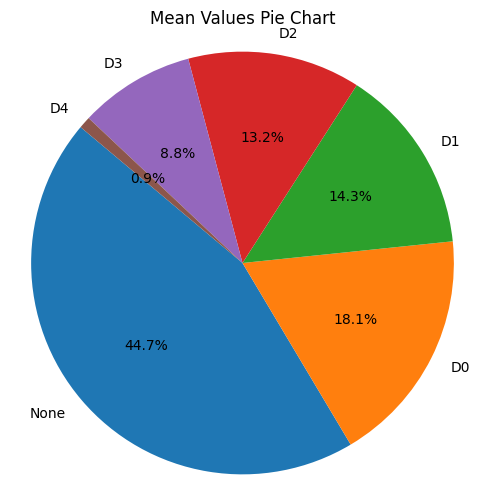

In [20]:
pred_col=np.array(['None','D0','D1','D2',"D3",'D4'])
# plt.bar(x=pred_col,height=df[pred_col].mean())

plt.figure(figsize=(6, 6))
plt.pie(df[pred_col].mean(), labels=pred_col, autopct='%1.1f%%', startangle=140)
plt.title('Mean Values Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

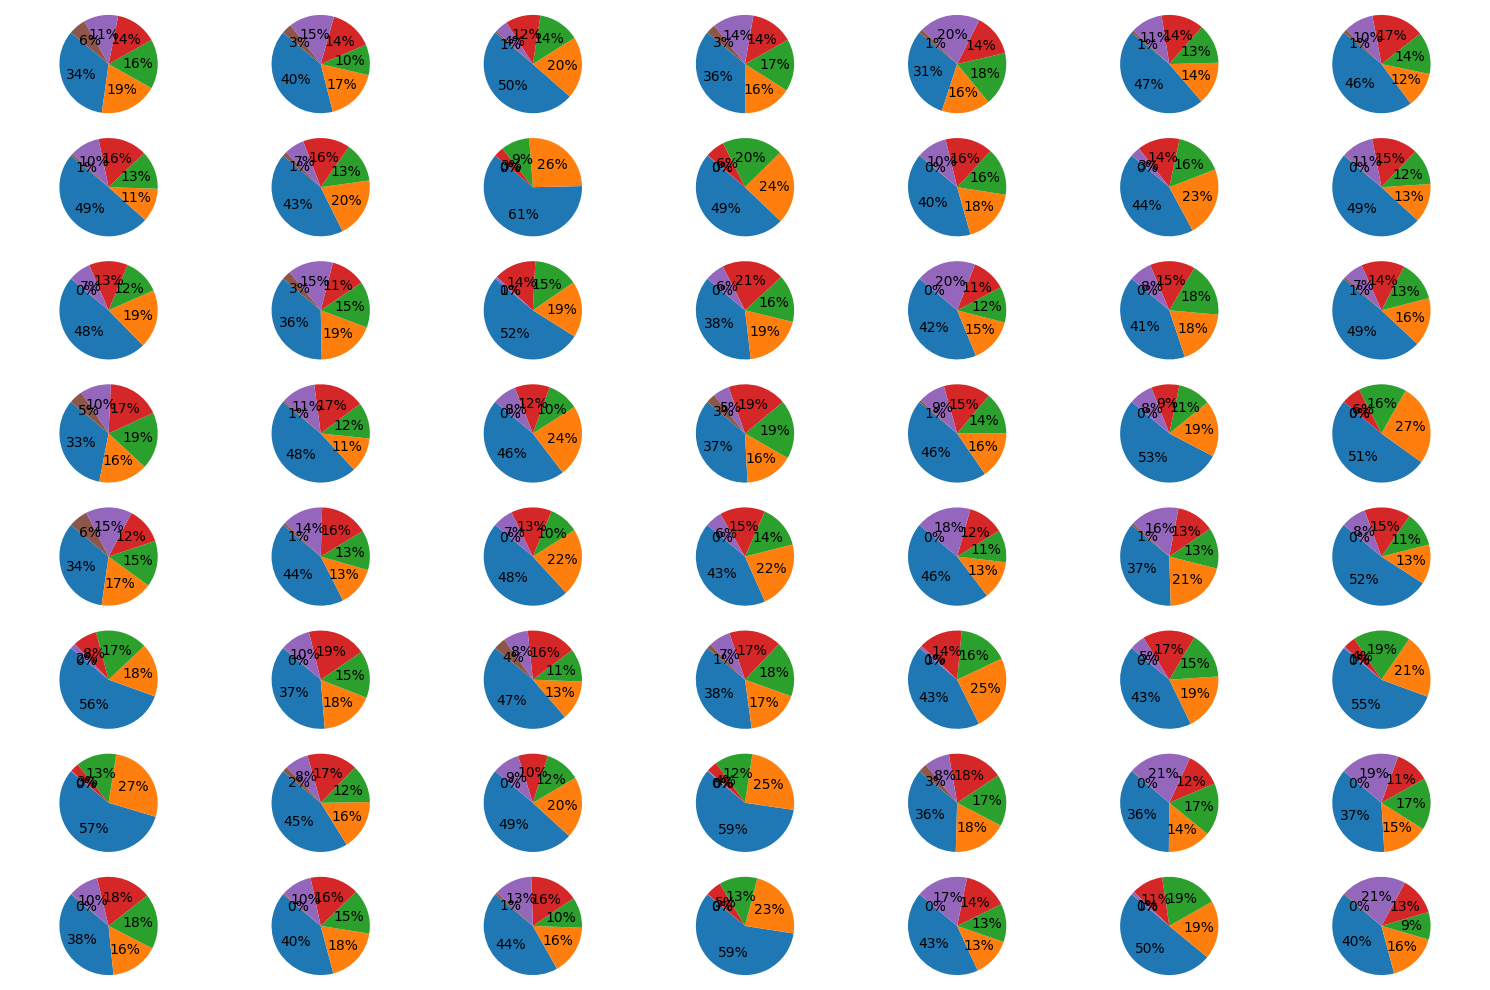

In [343]:
plt.figure(figsize=(15, 10))

# Iterate over FIPS codes from 30001 to 30011 with a step of 2
for i in range(30001, 30112, 2):
    # Filter the DataFrame for the current FIPS code
    filtered_df = df[df['fips'] == i]
    county_name=filtered_df.head(1)['County']
    # Group by month and calculate the mean DSCI value
    mean = filtered_df[pred_col].mean()
    # Plot the grouped data
    plt.subplot(8, 7, (i - 30001) // 2 + 1)  # Adjust subplot position
    plt.pie(mean, autopct='%0.f%%', startangle=140)
    # plt.title(f'{county_name}')
    plt.axis('equal')
    

plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()

In [344]:
df['None'].mean()


44.663521172178896

### avg_dsci_per_county

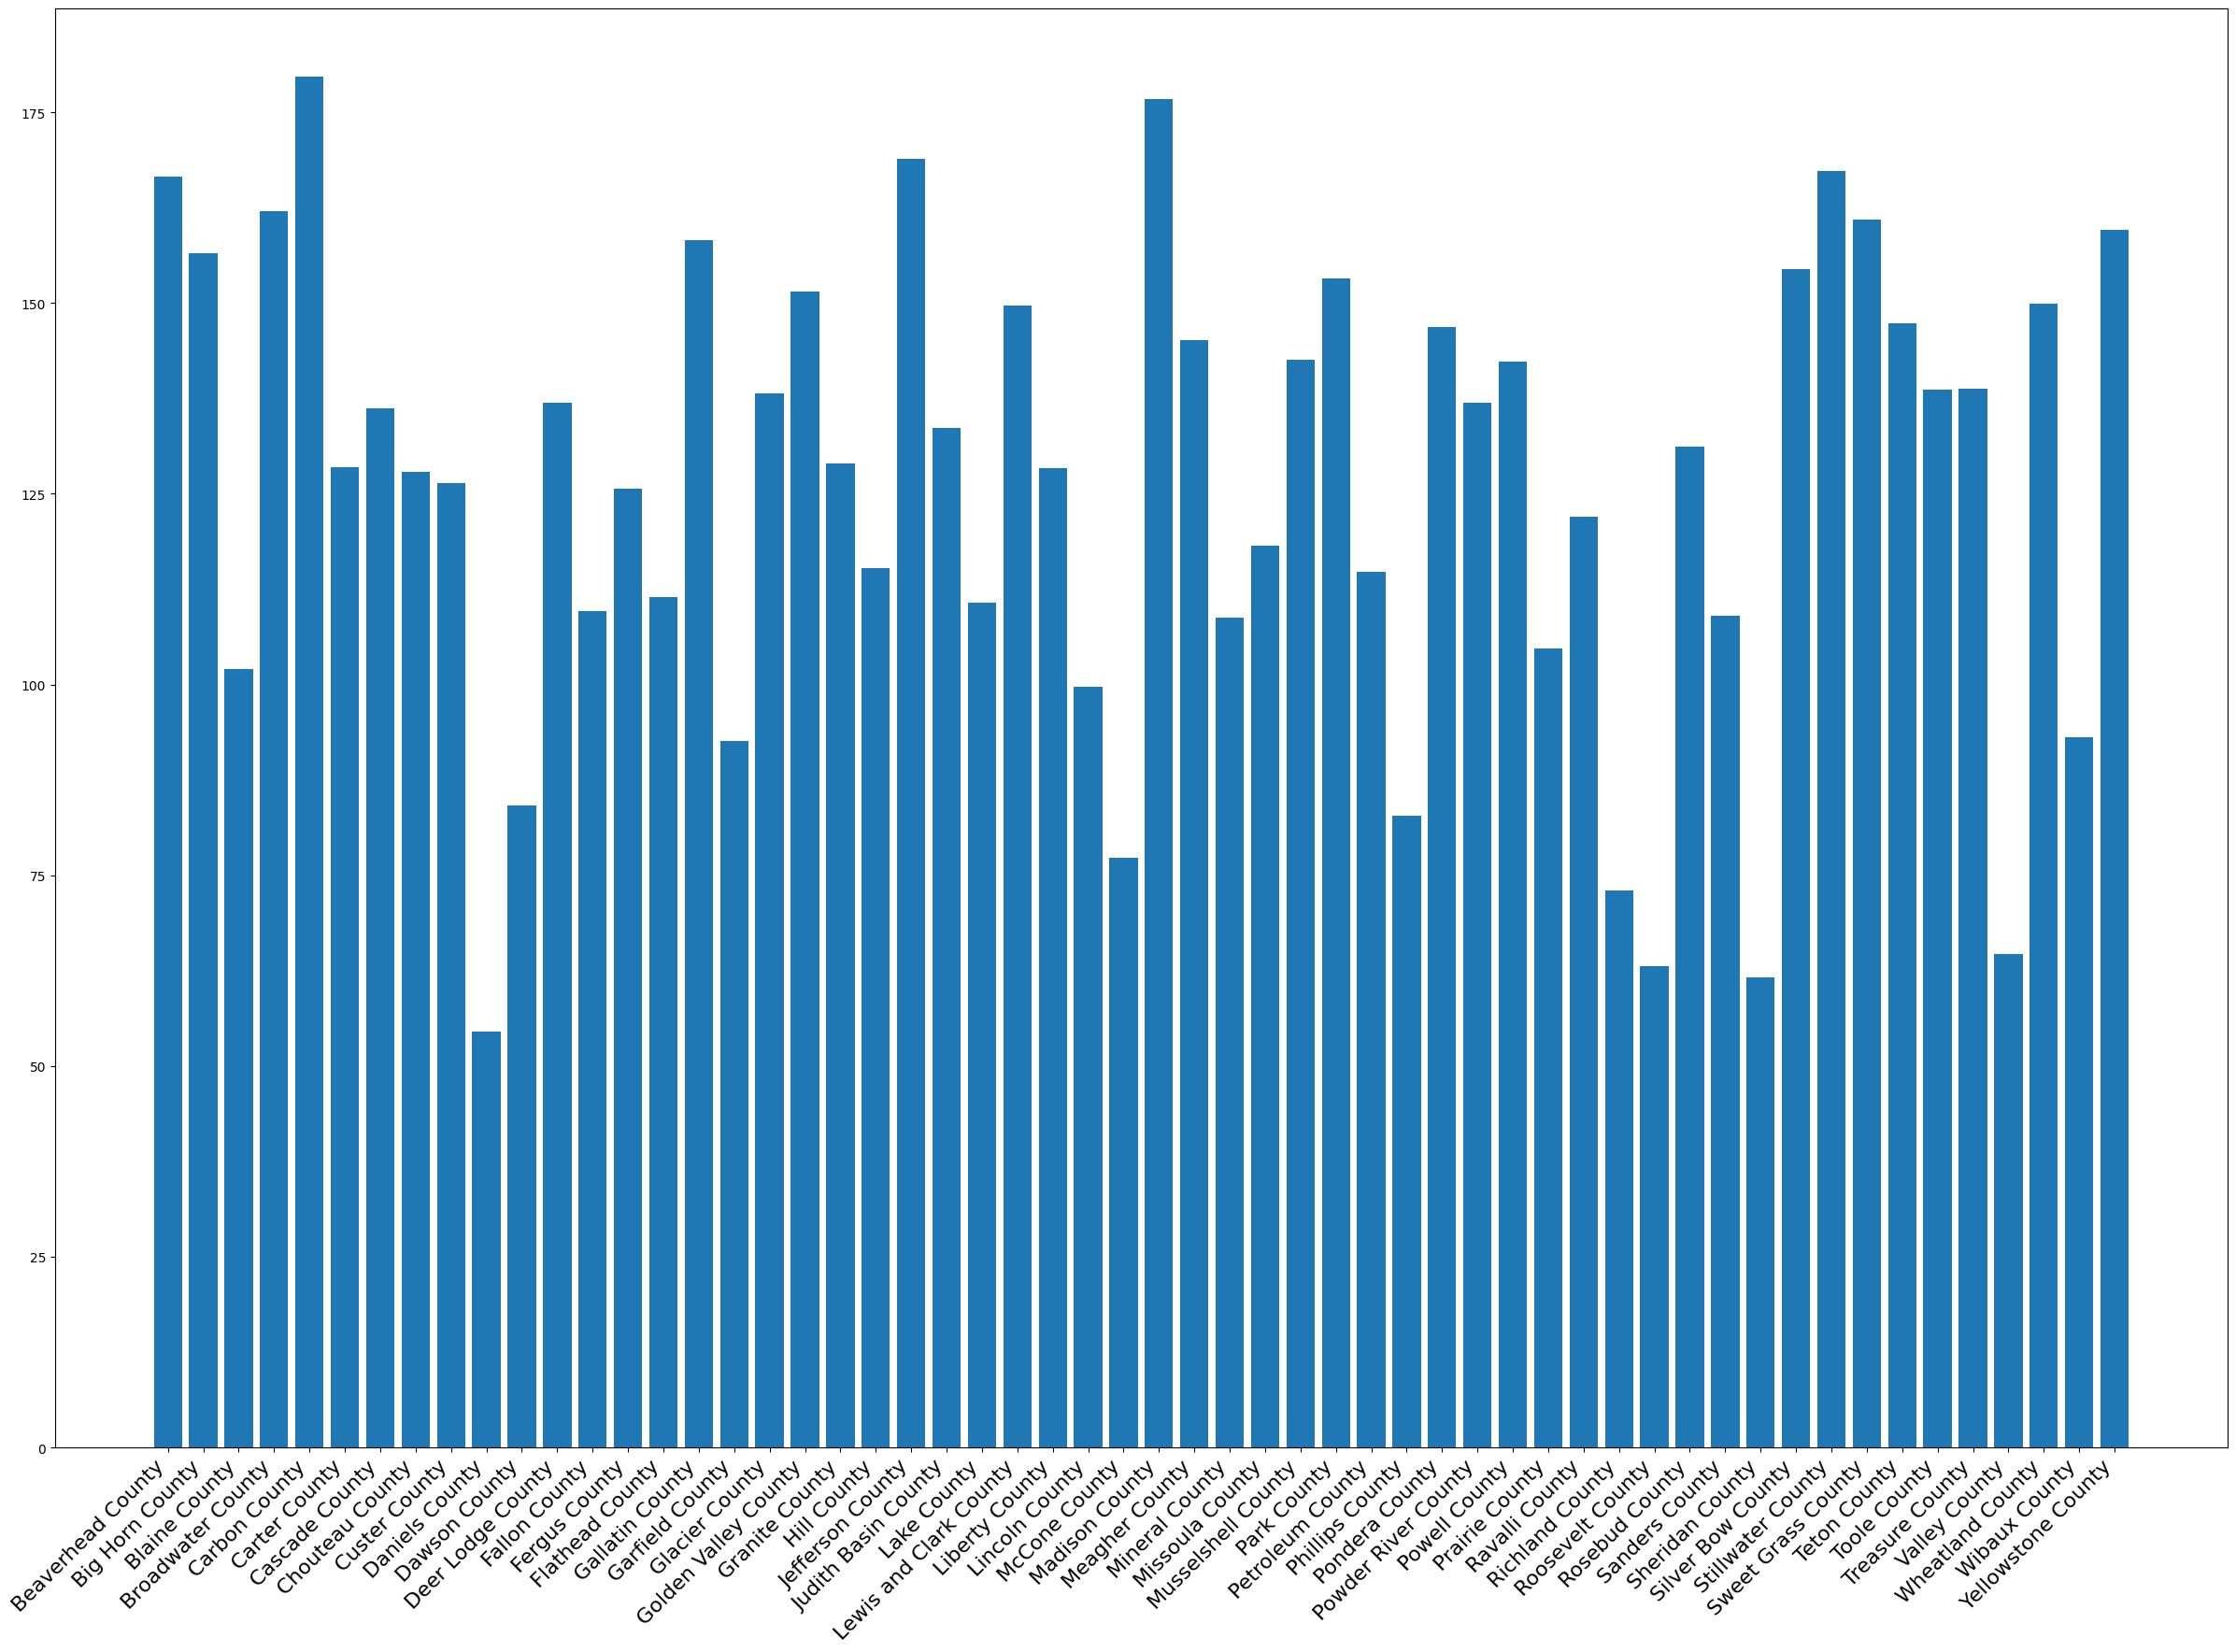

In [21]:
# DSCI value for different counties
avg_dsci_per_county=[]
for i in range(30001,30112,2):
    avg_dsci_per_county.append(df[df['fips']==i]['DSCI'].mean())
avg_dsci_per_county

plt.figure(figsize=(30,20)) 
plt.bar(x=df['County'].unique(), height=avg_dsci_per_county)
plt.xticks(rotation=45, ha='right',fontsize=16)  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.show()

### variation of DSCI by month for whole montana as well as some counties

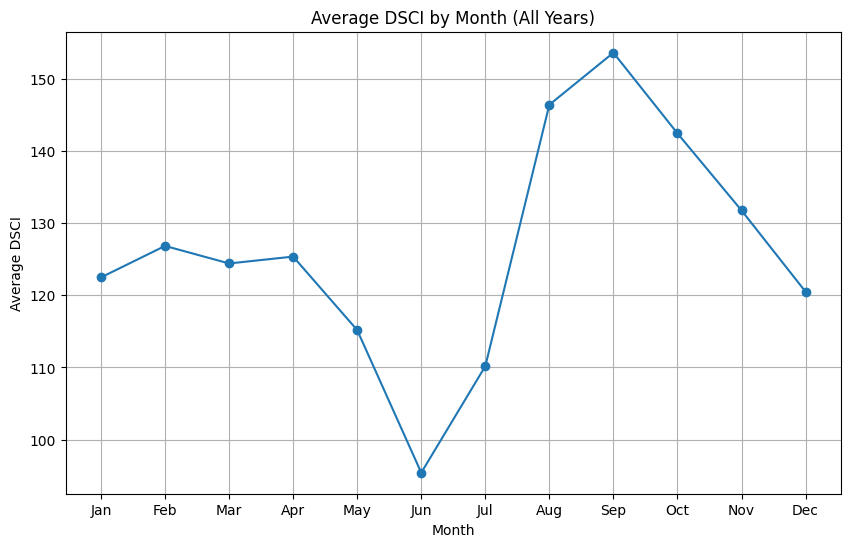

In [346]:
# Assuming your date column is named 'date_column_name'
# Convert it to datetime format if it's not already
# df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.month

# Group by month and calculate the mean DSCI value
monthly_grouped = df.groupby('month')['DSCI'].mean()

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.plot(monthly_grouped.index, monthly_grouped, marker='o')
plt.xlabel('Month')
plt.ylabel('Average DSCI')
plt.title('Average DSCI by Month (All Years)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom x-axis labels
plt.grid(True)
plt.show()


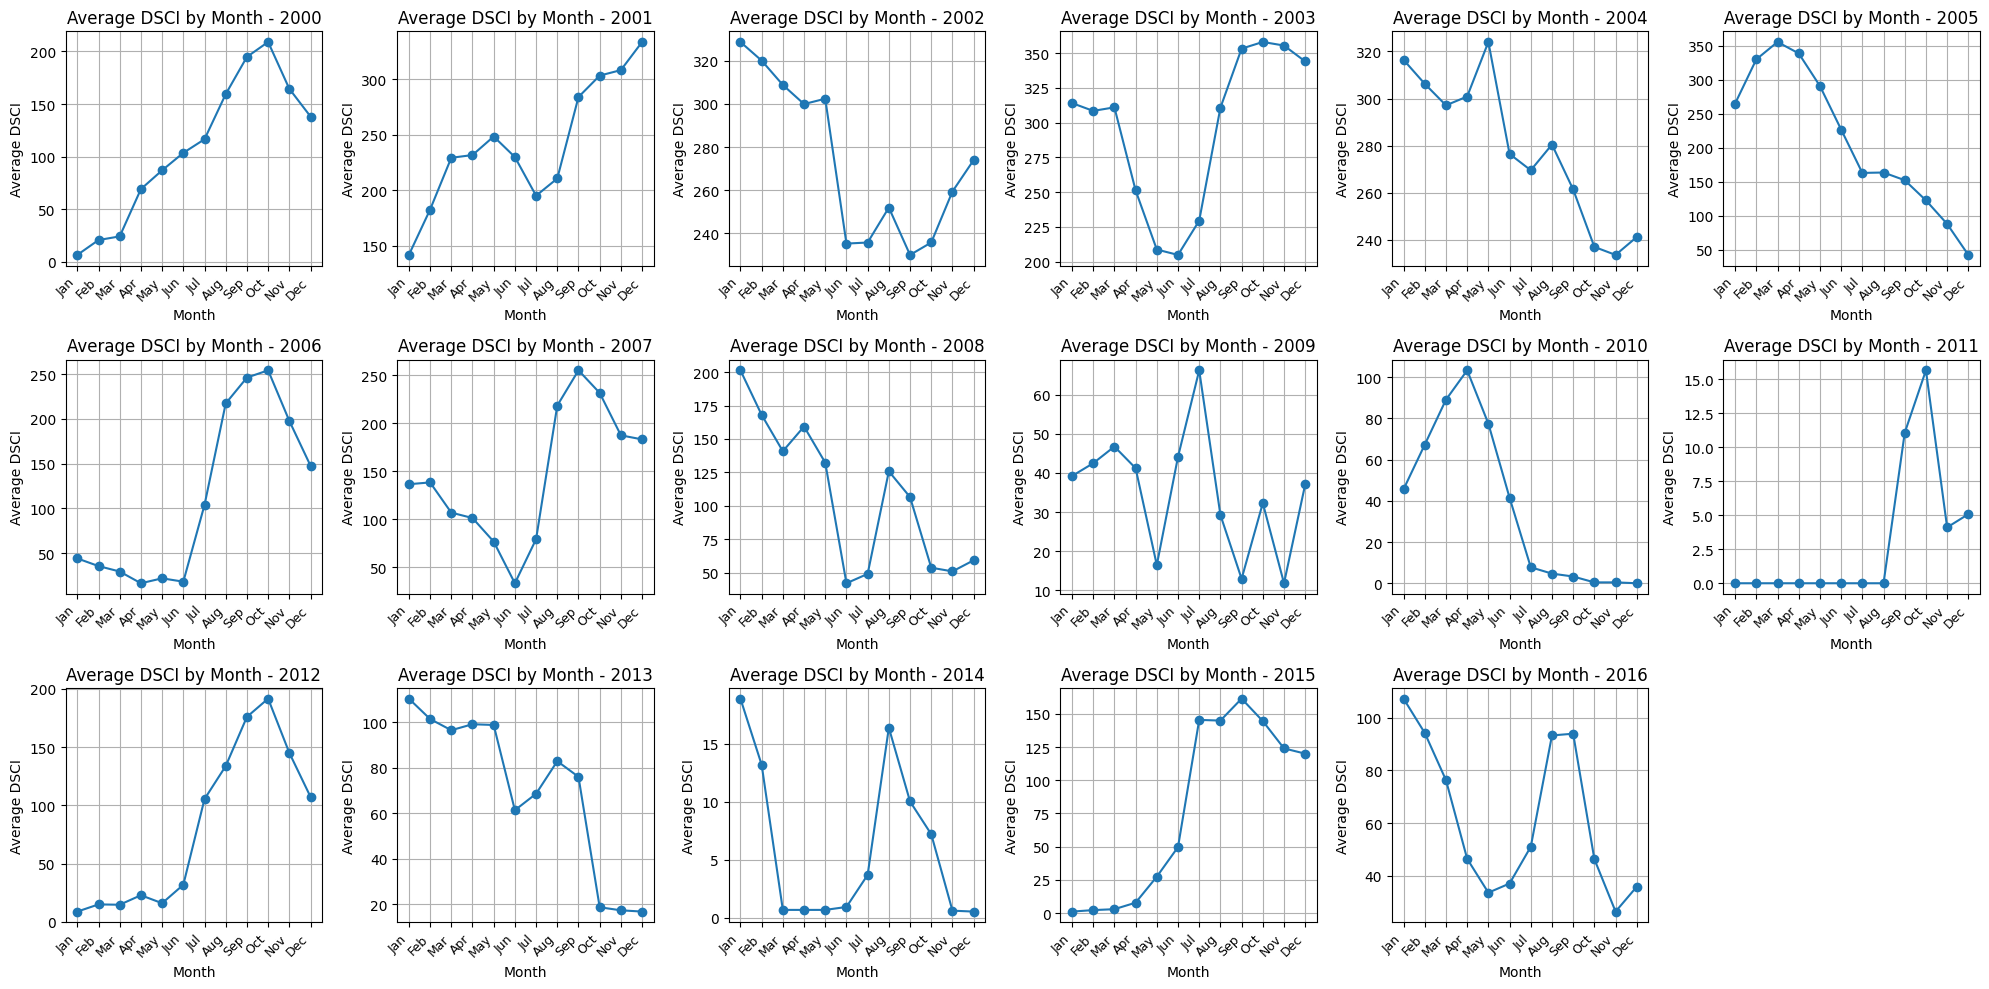

In [370]:
import matplotlib.pyplot as plt

# Assuming 'date' column is datetime format
df['month'] = df['date'].dt.month

# Group by year and month and calculate the mean DSCI value
monthly_grouped = df.groupby([df['date'].dt.year, 'month'])['DSCI'].mean().reset_index()

# Get unique years
years = monthly_grouped['date'].unique()

# Create subplots for each year
plt.figure(figsize=(20, 10))

for i, year in enumerate(years):
    # Filter data for the current year
    year_data = monthly_grouped[monthly_grouped['date'] == year]
    plt.subplot(3, 6, i + 1)  # Adjusted the index
    # Plot the grouped data for the current year
    plt.plot(year_data['month'], year_data['DSCI'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average DSCI')
    plt.title(f'Average DSCI by Month - {year}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=45, ha='right',fontsize=9)  # Adjusted the function name
    plt.grid(True)
plt.subplots_adjust(hspace=0.2,wspace=0.2)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



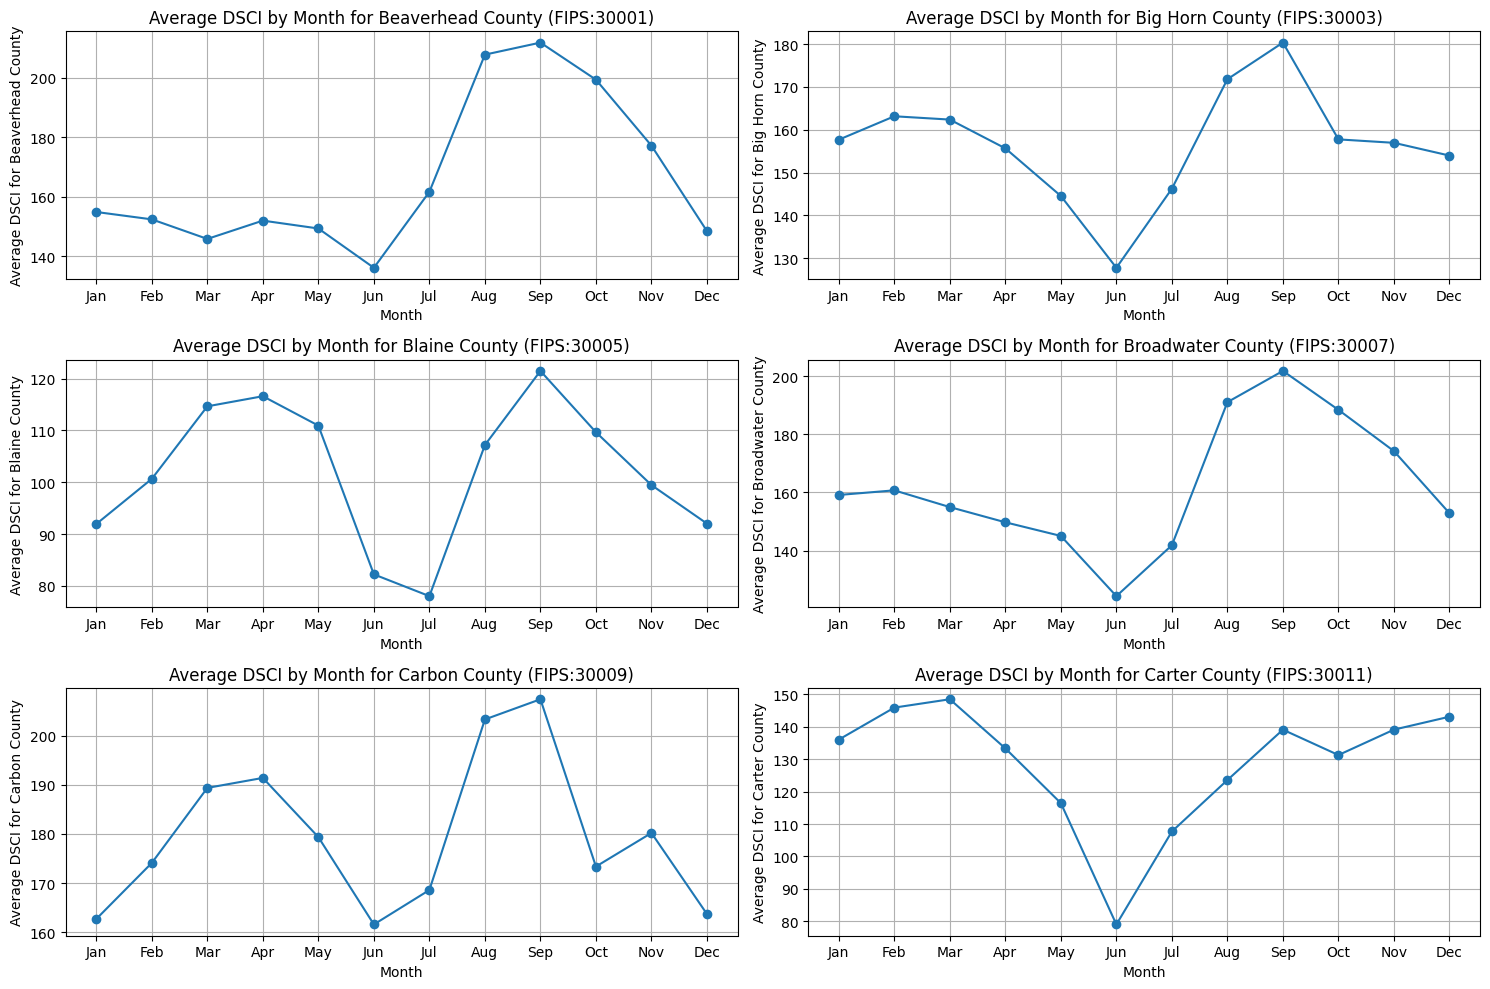

In [347]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Iterate over FIPS codes from 30001 to 30011 with a step of 2
for i in range(30001, 30012, 2):
    # Filter the DataFrame for the current FIPS code
    filtered_df = df[df['fips'] == i]
    county_name = filtered_df.head(1)['County'].values[0]  # Extracting the county name
    # Group by month and calculate the mean DSCI value
    monthly_grouped = filtered_df.groupby('month')['DSCI'].mean()
    # Plot the grouped data
    plt.subplot(3, 2, (i - 30001) // 2 + 1)  # Adjust subplot position
    plt.plot(monthly_grouped.index, monthly_grouped, marker='o')
    plt.xlabel('Month')
    plt.ylabel(f'Average DSCI for {county_name}')
    plt.title(f'Average DSCI by Month for {county_name} (FIPS:{i})')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom x-axis labels
    plt.grid(True)

plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()


### do we have same number of rows for every county?  yes! exactly

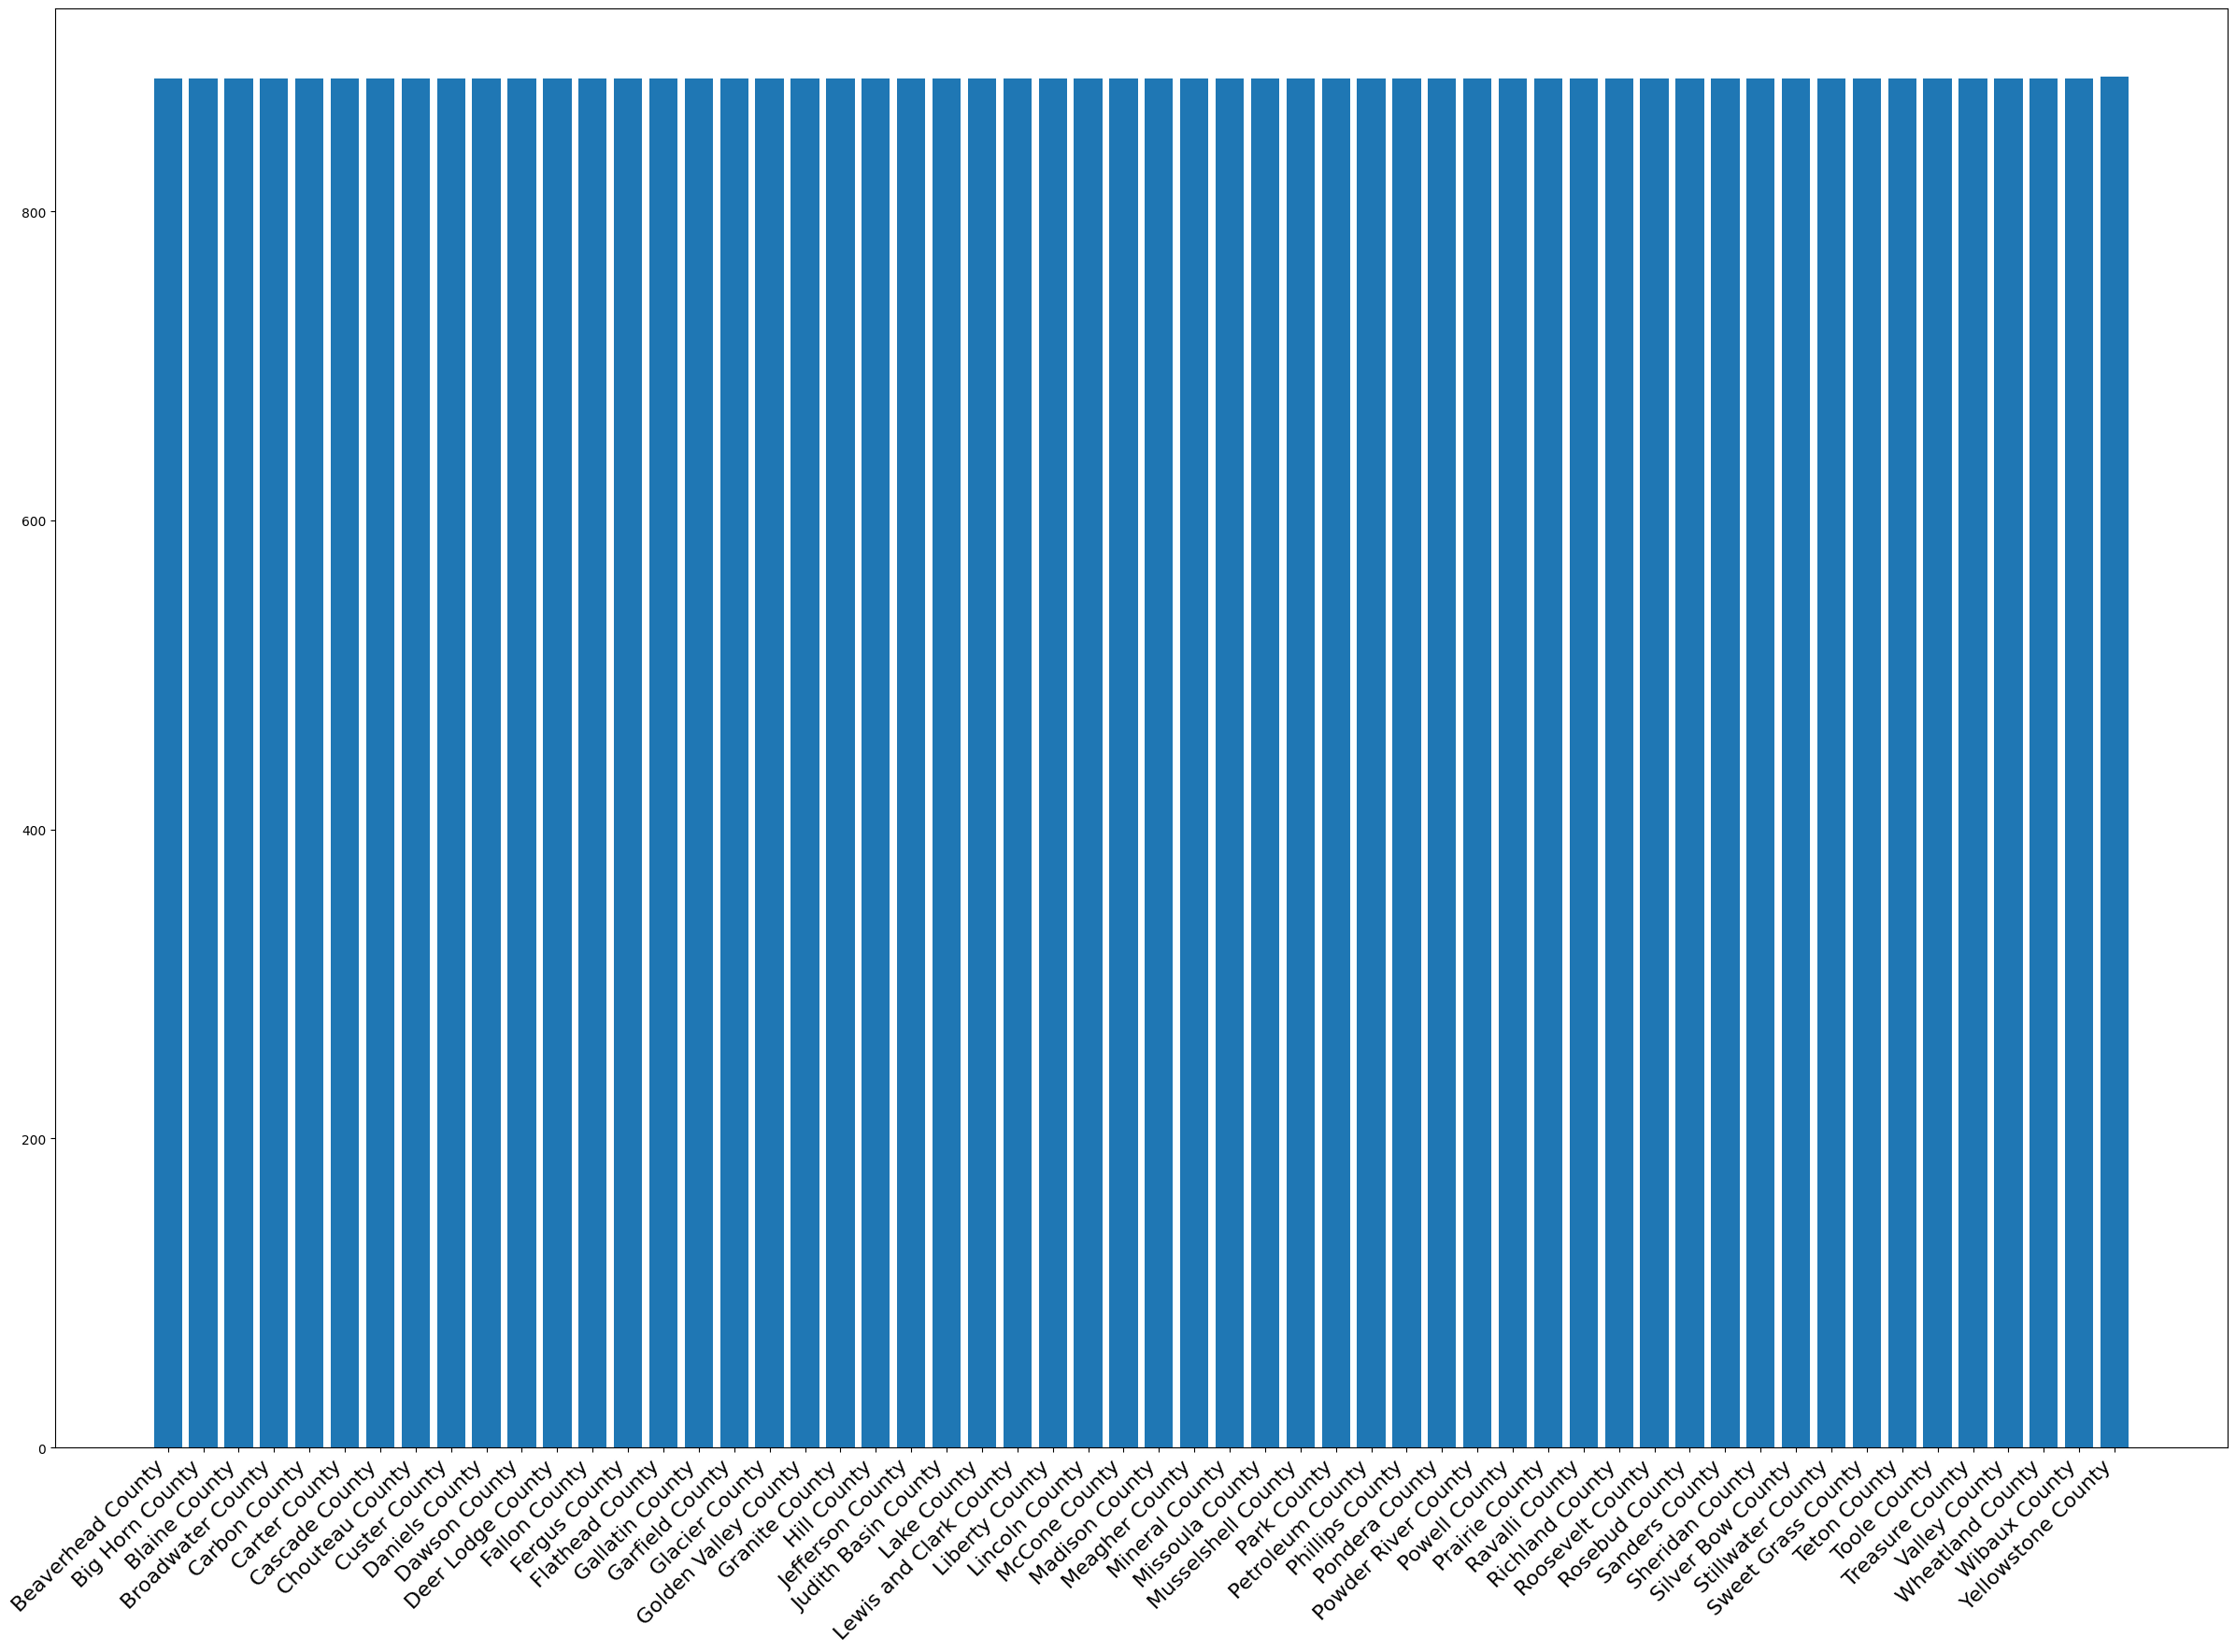

In [348]:
# DSCI value for different counties
freq_per_county=[]
for i in range(30001,30112,2):
    freq_per_county.append((df['fips']==i).sum())
freq_per_county

plt.figure(figsize=(30,20)) 
plt.bar(x=df['County'].unique(), height=freq_per_county)
plt.xticks(rotation=45, ha='right',fontsize=16)  # Rotate the x-axis labels by 45 degrees and align them to the right
plt.show()

### hist of every weather predictor

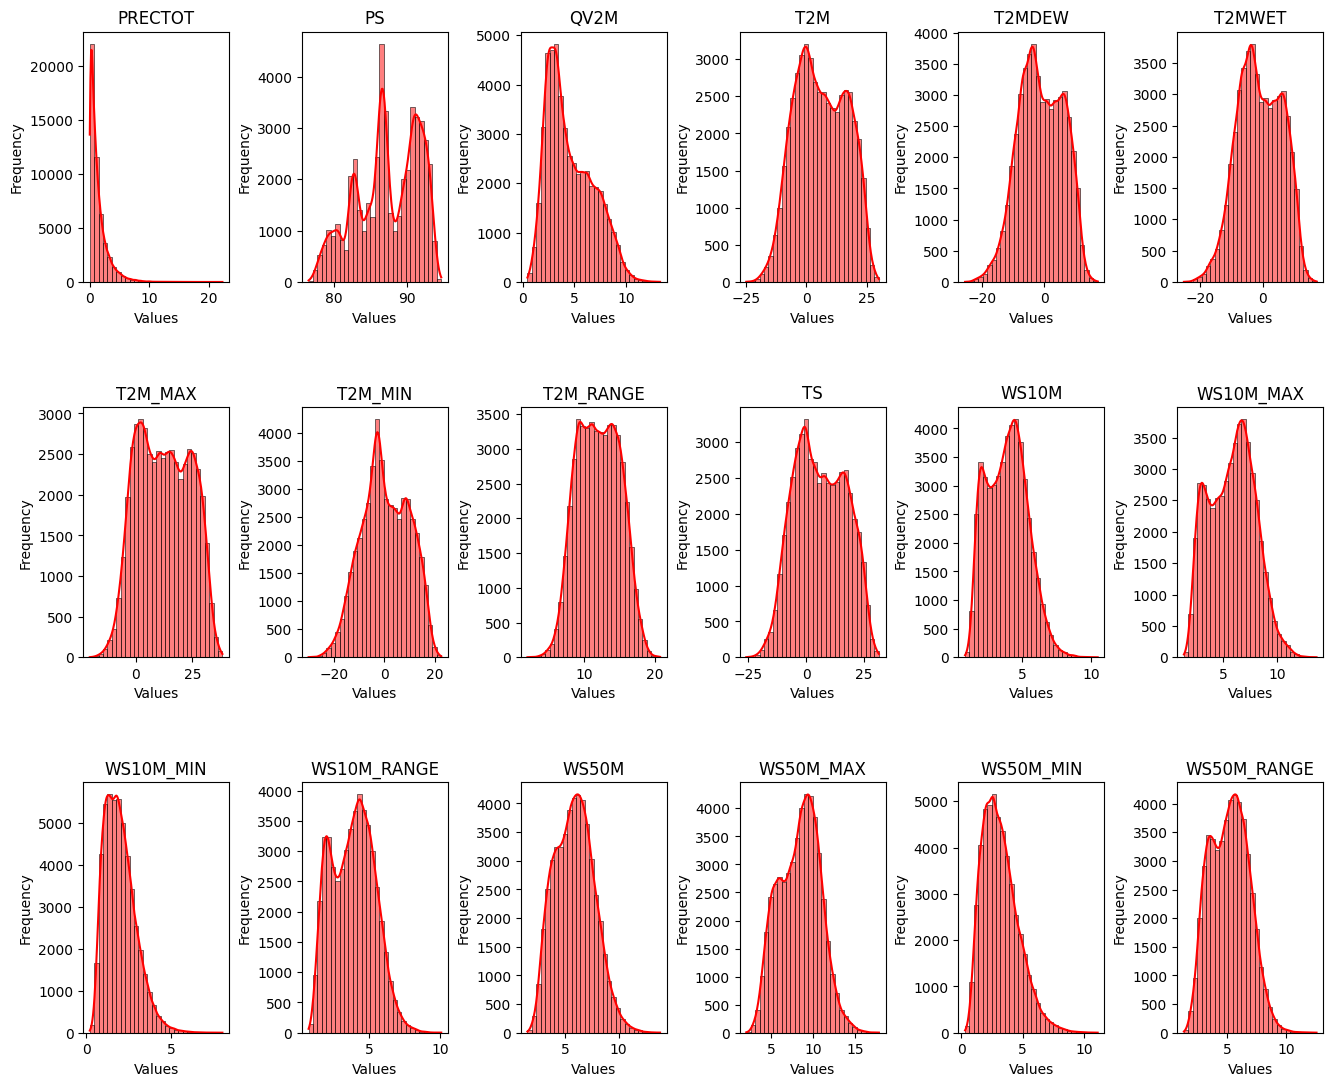

In [359]:
import seaborn as sns  # Import seaborn for KDE plot

plt.figure(figsize=(16, 13))
for i in range(len(X_col_wit_fips)):
    plt.subplot(3, 6, i + 1)
    sns.histplot(df[X_col_wit_fips[i]], bins=30, color='red', edgecolor='black', kde=True)
    # plt.vlines(x=df[X_col_wit_fips[i]].mean(),ymin=0,ymax=5000)  # Change the color of the KDE curve
    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'{X_col_wit_fips[i]}')
# Show the plot
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


### Normalize the X_col_without_fips coolumns

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and you want to normalize specific columns
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform the data
df_normalized = df.copy()  # Make a copy of the DataFrame to preserve the original data
df_normalized[X_col_wit_fips] = scaler.fit_transform(df_normalized[X_col_wit_fips])

NameError: name 'X_col_wit_fips' is not defined

In [28]:
(df["DSCI"]<200).sum()

34137

In [351]:
df_normalized

fips       date   PRECTOT        PS      QV2M       T2M    T2MDEW  \
0      30001.0 2000-01-07  0.338098 -1.987644 -1.177969 -1.587253 -1.481588   
1      30001.0 2000-01-14  0.507813 -1.976860 -0.869169 -1.291543 -1.054835   
2      30001.0 2000-01-21 -0.727530 -1.934062 -1.092584 -1.548127 -1.360008   
3      30001.0 2000-01-28 -0.364877 -1.909799 -1.281972 -1.827911 -1.765546   
4      30001.0 2000-02-04 -0.564961 -1.794548 -0.825514 -1.245004 -0.942231   
...        ...        ...       ...       ...       ...       ...       ...   
49612  30111.0 2016-12-02 -0.737355  0.187298 -0.891639 -0.699300 -0.807392   
49613  30111.0 2016-12-09 -0.408645  0.310973 -1.468151 -1.630360 -1.978310   
49614  30111.0 2016-12-16  0.380974  0.257055 -1.469435 -1.759132 -1.982594   
49615  30111.0 2016-12-23 -0.558709  0.200777 -1.105424 -1.155495 -1.176007   
49616  30111.0 2016-12-27 -0.813280  0.156294 -1.083596 -0.972907 -1.128681   

         T2MWET   T2M_MAX   T2M_MIN  ...   D0   D1   D2   D3   D4  ValidStart  \
0     -1.498384 -1.479402 -1.698364  ...  0.0  0.0  0.0  0.0  0.0  04-01-2000   
1     -1.069756 -1.303956 -1.468804  ...  0.0  0.0  0.0  0.0  0.0  11-01-2000   
2     -1.378475 -1.329305 -1.638230  ...  0.0  0.0  0.0  0.0  0.0  18-01-2000   
3     -1.788387 -1.511495 -2.041391  ...  0.0  0.0  0.0  0.0  0.0  25-01-2000   
4     -0.956223 -1.160228 -1.474215  ...  0.0  0.0  0.0  0.0  0.0  01-02-2000   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...         ...   
49612 -0.807313 -0.812332 -0.480226  ...  0.0  0.0  0.0  0.0  0.0  29-11-2016   
49613 -1.944495 -1.632372 -1.584589  ...  0.0  0.0  0.0  0.0  0.0  06-12-2016   
49614 -1.971850 -1.718284 -1.908601  ...  0.0  0.0  0.0  0.0  0.0  13-12-2016   
49615 -1.179587 -1.180332 -1.068735  ...  0.0  0.0  0.0  0.0  0.0  20-12-2016   
49616 -1.104926 -1.012129 -0.956351  ...  0.0  0.0  0.0  0.0  0.0  27-12-2016   

         ValidEnd  StatisticFormatID  DSCI  month  
0      10-01-2000                1.0   0.0      1  
1      17-01-2000                1.0   0.0      1  
2      24-01-2000                1.0   0.0      1  
3      31-01-2000                1.0   0.0      1  
4      07-02-2000                1.0   0.0      2  
...           ...                ...   ...    ...  
49612  05-12-2016                1.0   0.0     12  
49613  12-12-2016                1.0   0.0     12  
49614  19-12-2016                1.0   0.0     12  
49615  26-12-2016                1.0   0.0     12  
49616  02-01-2017                1.0   0.0     12  

[49617 rows x 34 columns]

### Applying pca (we need 4 pc(s) to explain 95% var)

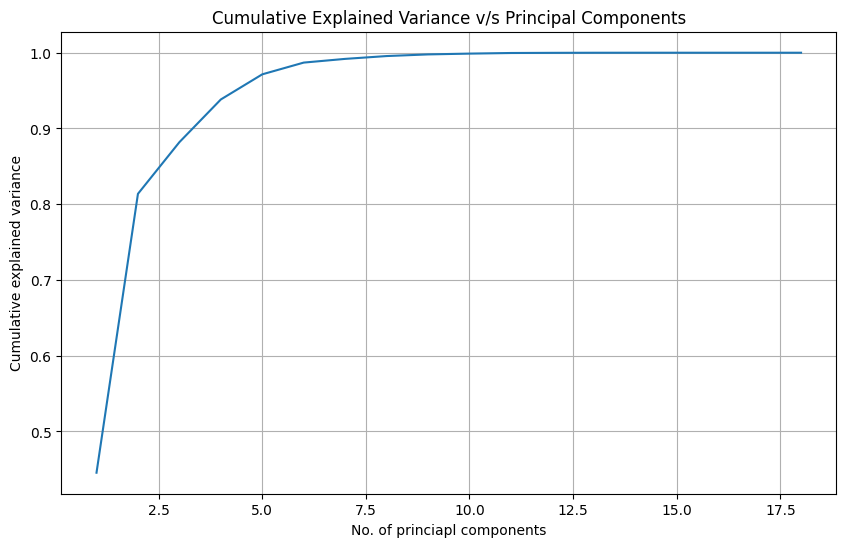

In [352]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X_col_wit_fips))
pca.fit(df_normalized[X_col_wit_fips])

# cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio)

# plot of the pc vs cum explained experience
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance)
plt.xlabel("No. of princiapl components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative Explained Variance v/s Principal Components")
plt.grid(True)
plt.show()



In [353]:
# Assuming pca is your fitted PCA object

# Desired explained variance
desired_variance = 0.95  # For example, 40%

# Calculate the cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed for the desired variance
n_components_desired_variance = np.argmax(explained_variance_ratio_cumulative >= desired_variance) + 1

print("Number of components needed for", int(desired_variance * 100), "% variance:", n_components_desired_variance)


Number of components needed for 95 % variance: 5


### Correlation Heat Map (different kind of temp and different kind of wind speed have high correlation)

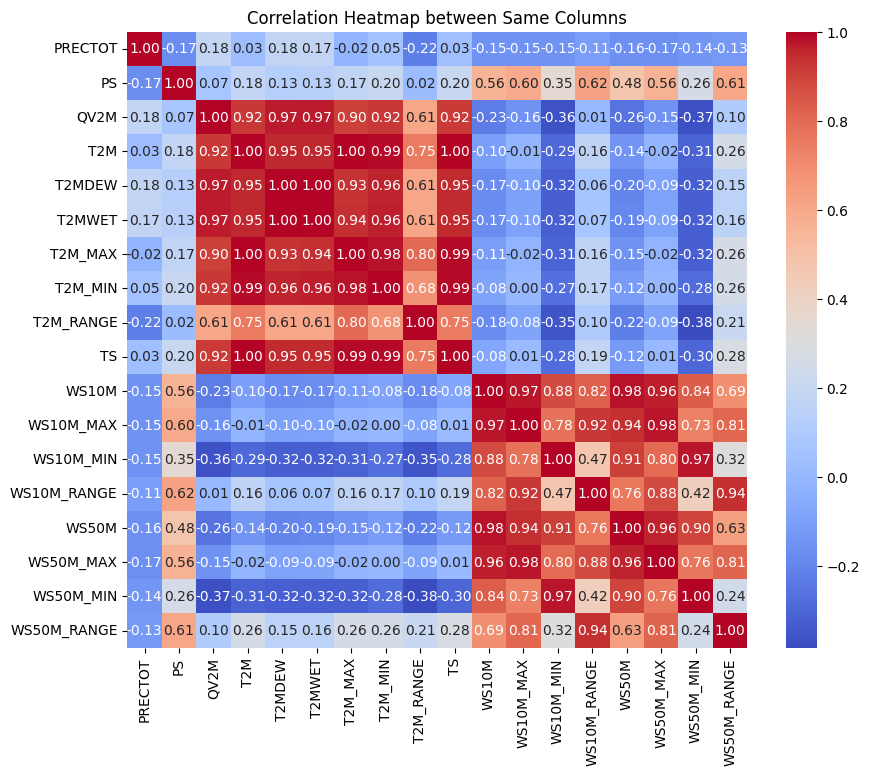

In [354]:
# Assuming df is your DataFrame containing the columns you want to compute correlation for
# You may need to specify the columns explicitly if you don't want to compute correlations for all columns
# columns_to_correlate = df.columns

# Compute the correlation matrix
correlation_matrix = df[X_col_wit_fips].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Same Columns')
plt.show()


### Predictor vs target scatter

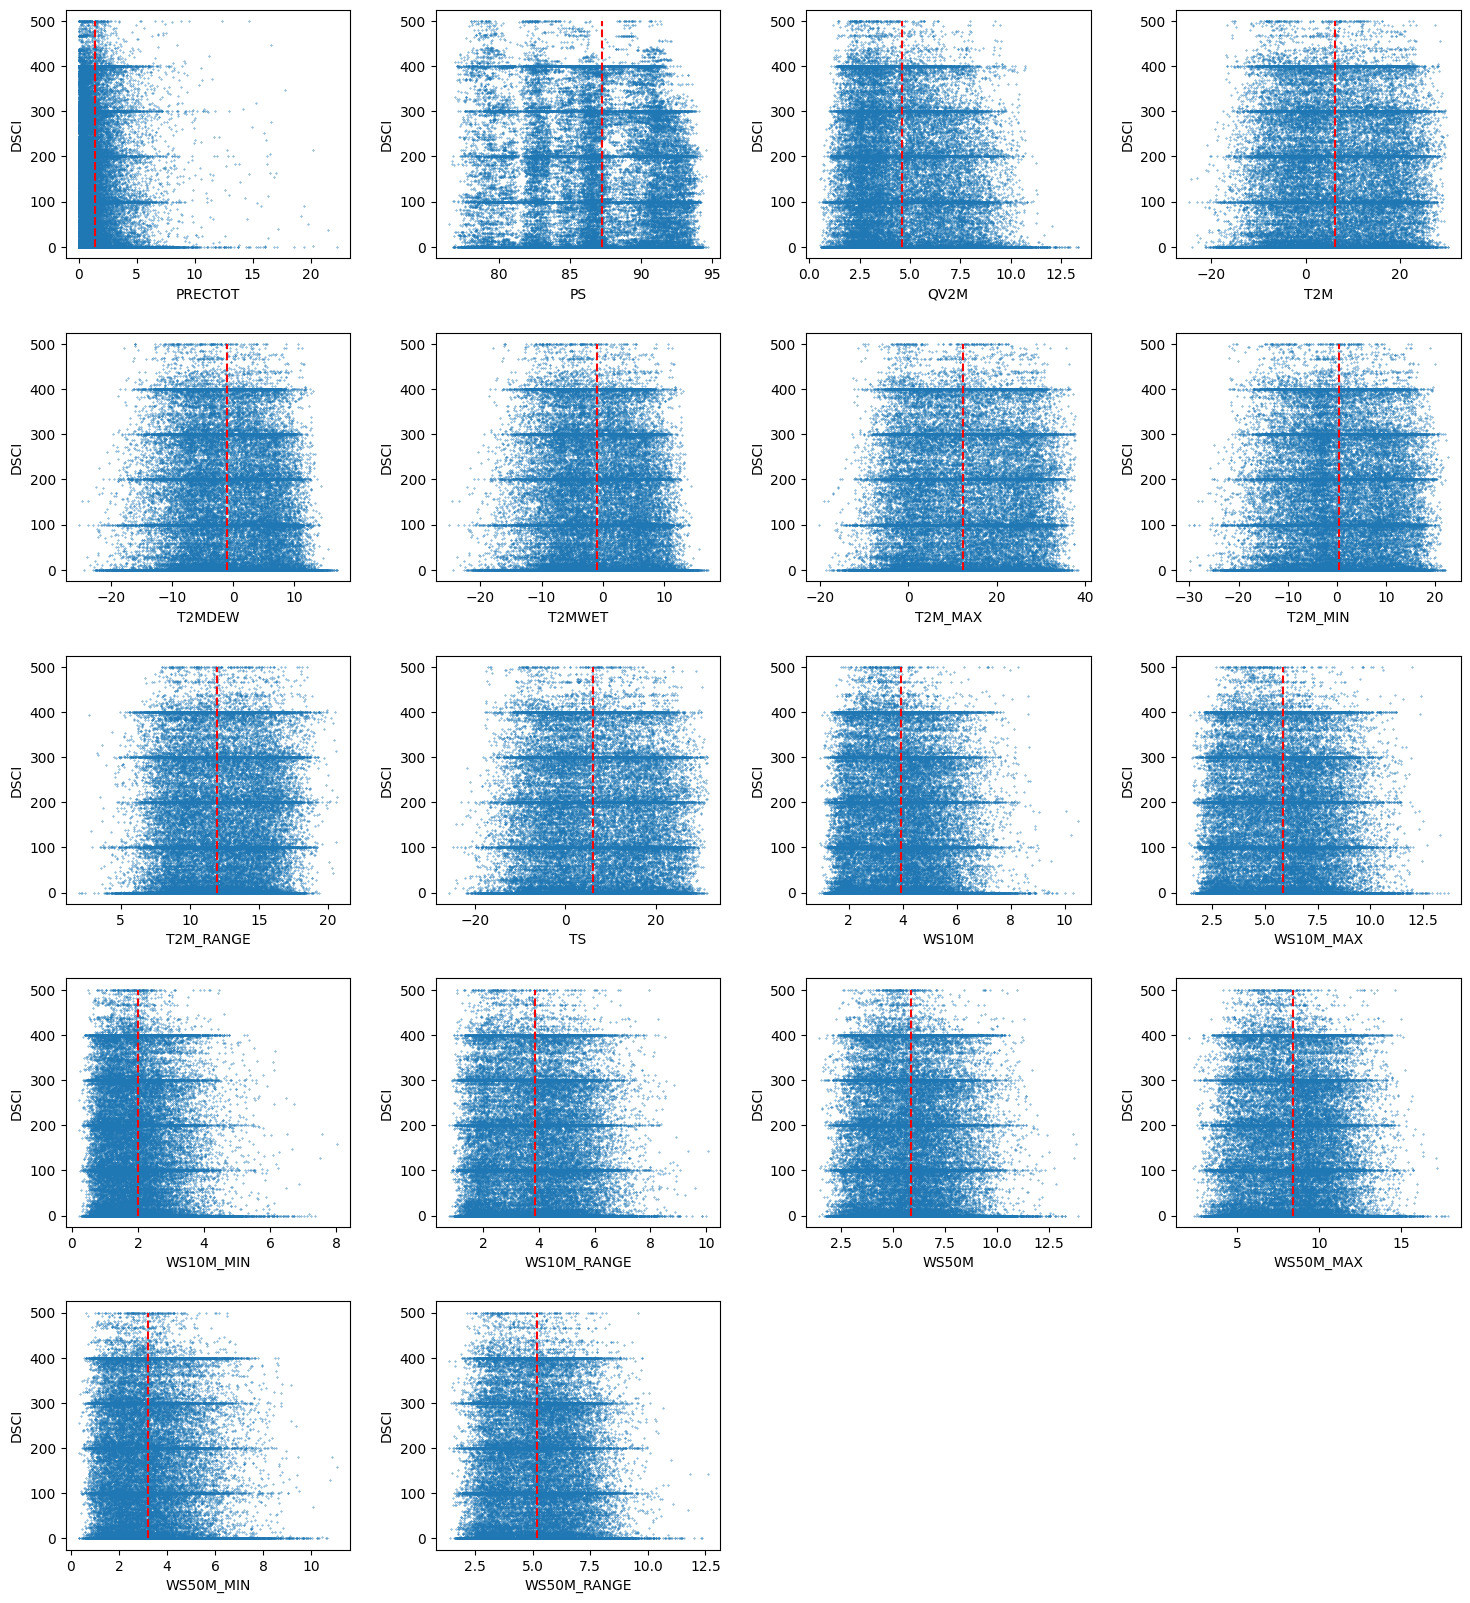

In [355]:
plt.figure(figsize=(18,20))
for i,predictor in enumerate(X_col_wit_fips):
    plt.subplot(5,4,i+1)
    plt.scatter(df[predictor],df['DSCI'],s=0.1)
    plt.vlines(x=df[predictor].mean(),ymin=0,ymax=500,colors='r',linestyles='dashed')
    plt.xlabel(f"{predictor}")
    plt.ylabel('DSCI')
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()


Since we have make our data by merging drough data and weather data from two different sources . the weather data was daily but the drough data was weekly available therfore we merge the data of drought with weather data by taking weekly mean .

In [372]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame containing weekly weather data and DSCI values

# Data preprocessing
# Assuming 'weekly_weather_data' contains the input features and 'DSCI' contains the target variable
X = df[pred_col].values.reshape(-1, 1)  # Reshape to 2D array
y = df['DSCI'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into input sequences and corresponding target values
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X_seq, y_seq = create_sequences(X_scaled, seq_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict future DSCI values
# Assuming 'future_weather_data' contains the input features for future weeks
# future_data_scaled = scaler_X.transform(future_weather_data)
# future_sequences = future_data_scaled[-seq_length:].reshape(1, seq_length, 1)
# predicted_scaled = model.predict(future_sequences)
# predicted = scaler_y.inverse_transform(predicted_scaled)
# print("Predicted DSCI value for next week:", predicted)


AttributeError: module 'keras.src.backend' has no attribute 'floatx'

In [374]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame containing weekly weather data and DSCI values

# Data preprocessing
# Assuming 'weekly_weather_data' contains the input features and 'DSCI' contains the target variable
X = df[pred_col].values.reshape(-1, 1)  # Reshape to 2D array
y = df['DSCI'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into input sequences and corresponding target values
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X_seq, y_seq = create_sequences(X_scaled, seq_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict future DSCI values
# Assuming 'future_weather_data' contains the input features for future weeks
# future_data_scaled = scaler_X.transform(future_weather_data)
# future_sequences = future_data_scaled[-seq_length:].reshape(1, seq_length, 1)
# predicted_scaled = model.predict(future_sequences)
# predicted = scaler_y.inverse_transform(predicted_scaled)
# print("Predicted DSCI value for next week:", predicted)


AttributeError: module 'keras.src.backend' has no attribute 'floatx'

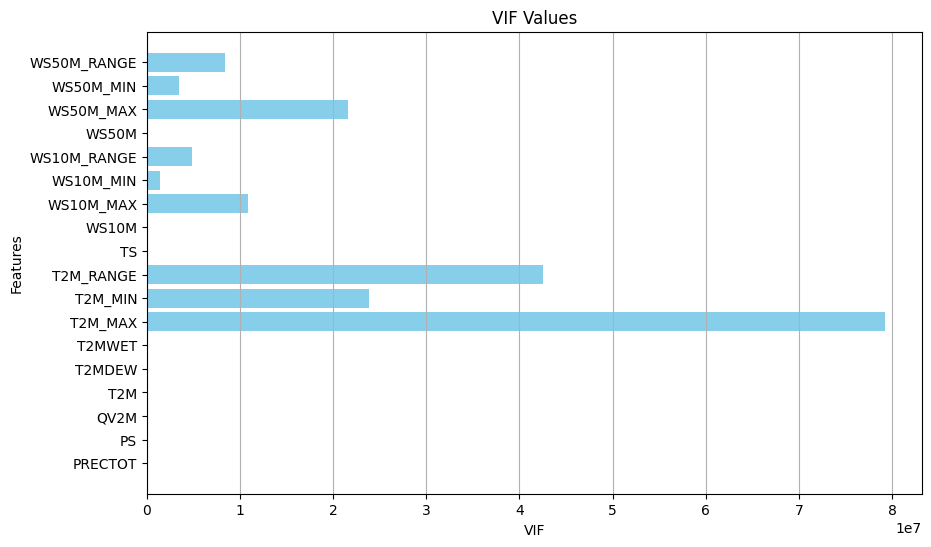

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame containing the variables
# Drop any non-numeric columns if necessary
numeric_df = df[X_col_wit_fips]

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

plt.figure(figsize=(10, 6))
plt.barh(vif_data["feature"], vif_data["VIF"], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('VIF Values')
plt.grid(axis='x')
plt.show()